In [76]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
random.seed(1234)

In [77]:
xsize = 1000
X = np.random.rand(xsize,10)
# only X[:,0], X[:,4], X[:,1] and X[:,2] are relevant and their relevance is in that order


In [127]:
x = np.arange(0.5,1, 0.01)
y_boundary = -0.5+2*x**2#-50/9 * (x-0.5)**2 + 0.5

In [128]:
def Label(x):
    # takes x0, ... x9 and assigns label
    
    if x[1] > -0.5+2*x[0]**2.:  #-50/9 * (x[0]-0.5)**2 + 0.5: # mostly 1
        out = np.random.choice(2,1, p=[0.05, 0.95])
    
    else: # mostly 0
        out = np.random.choice(2,1, p=[0.95, 0.05])
    return(out)

In [129]:
y_NN = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    y_NN[i] = Label(X[i,:])

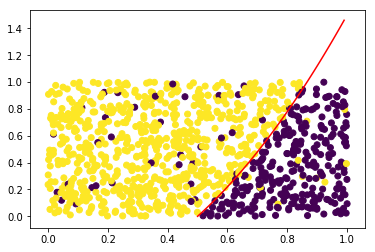

In [130]:
plt.scatter(X[:,0], X[:,1], c = y_NN)
plt.plot(x, y_boundary, c="red")


In [138]:
X.shape

(1000, 10)

In [139]:


X_trainNN, X_testNN, y_trainNN, y_testNN = sklearn.model_selection.train_test_split( X[:,0:3], yNN, 
                                                                                    test_size=0.33, 
                                                                                    random_state=42)

In [141]:
# define the keras model
NN = keras.models.Sequential()
NN.add(keras.layers.Dense(12, input_dim=X_trainNN.shape[1], activation='relu'))
NN.add(keras.layers.Dense(50, activation='relu'))
NN.add(keras.layers.Dense(50, activation='relu'))
NN.add(keras.layers.Dense(20, activation='relu'))
NN.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
NN.fit(X_trainNN,y_trainNN, epochs=100, batch_size=10,validation_split=0.2)
# evaluate the keras model
_, accuracy = NN.evaluate(X_testNN,y_testNN)
print('Accuracy: %.2f' % (accuracy*100))

Train on 536 samples, validate on 134 samples
Epoch 1/100
536/536 [==============================] - 0s 566us/sample - loss: 0.6984 - acc: 0.4720 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/100
536/536 [==============================] - 0s 78us/sample - loss: 0.6924 - acc: 0.5019 - val_loss: 0.6944 - val_acc: 0.4925
Epoch 3/100
536/536 [==============================] - 0s 70us/sample - loss: 0.6934 - acc: 0.4963 - val_loss: 0.6981 - val_acc: 0.4478
Epoch 4/100
536/536 [==============================] - 0s 69us/sample - loss: 0.6923 - acc: 0.5019 - val_loss: 0.6971 - val_acc: 0.5075
Epoch 5/100
536/536 [==============================] - 0s 70us/sample - loss: 0.6906 - acc: 0.5448 - val_loss: 0.7002 - val_acc: 0.5299
Epoch 6/100
536/536 [==============================] - 0s 72us/sample - loss: 0.6905 - acc: 0.5560 - val_loss: 0.7021 - val_acc: 0.5299
Epoch 7/100
536/536 [==============================] - 0s 70us/sample - loss: 0.6896 - acc: 0.5466 - val_loss: 0.7028 - val_acc: 0.5149
E

536/536 [==============================] - 0s 69us/sample - loss: 0.6746 - acc: 0.5746 - val_loss: 0.7272 - val_acc: 0.4552
Epoch 61/100
536/536 [==============================] - 0s 69us/sample - loss: 0.6726 - acc: 0.5765 - val_loss: 0.7321 - val_acc: 0.5000
Epoch 62/100
536/536 [==============================] - 0s 69us/sample - loss: 0.6717 - acc: 0.5784 - val_loss: 0.7263 - val_acc: 0.4627
Epoch 63/100
536/536 [==============================] - 0s 68us/sample - loss: 0.6745 - acc: 0.5522 - val_loss: 0.7238 - val_acc: 0.5000
Epoch 64/100
536/536 [==============================] - 0s 68us/sample - loss: 0.6724 - acc: 0.5709 - val_loss: 0.7170 - val_acc: 0.4478
Epoch 65/100
536/536 [==============================] - 0s 68us/sample - loss: 0.6724 - acc: 0.5746 - val_loss: 0.7239 - val_acc: 0.4552
Epoch 66/100
536/536 [==============================] - 0s 68us/sample - loss: 0.6724 - acc: 0.5746 - val_loss: 0.7403 - val_acc: 0.4552
Epoch 67/100
536/536 [==============================] 

In [110]:
acc = NN.history.history['val_accuracy']
print(acc) # [0.9573, 0.9696, 0.9754, 0.9762, 0.9784]

# access validation loss for each epoch
loss_val = NN.history.history['val_loss']
print(loss_val) 

KeyError: 'val_accuracy'

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(1000,)


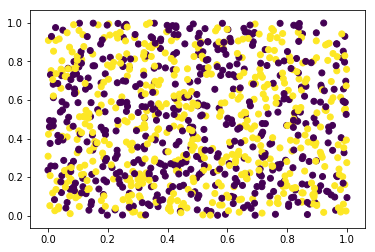

In [104]:
print(type(yNN))
print(yNN.shape)

pred = NN.predict(X)
pred = (pred > np.mean(pred))
pred = 1*pred
print(type(pred))
print(pred.reshape(-1).shape)
plt.scatter(X[:,0], X[:,1], c = pred.reshape(-1))


## NN part 2

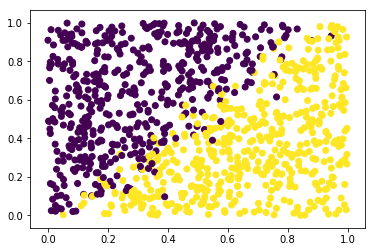

In [150]:
xsize = 1000
X = np.random.rand(xsize,10)
# only X[:,0], X[:,4], X[:,1] and X[:,2] are relevant and their relevance is in that order
y = 5.*X[:,0] - 1. * X[:,1] - 0.5*X[:,2] - 4.*X[:,4] + 0.2*np.random.normal(size=xsize) 
yNN = (y> np.mean(y))*1
plt.scatter(X[:,0], X[:,4], c = yNN)


In [177]:


X_trainNN, X_testNN, y_trainNN, y_testNN = sklearn.model_selection.train_test_split( X, yNN, 
                                                                                    test_size=0.66, 
                                                                                    random_state=42)

X_testNN, X_valNN, y_testNN, y_valNN = sklearn.model_selection.train_test_split( X_testNN, y_testNN, 
                                                                                    test_size=0.5, 
                                                                                    random_state=42)

In [178]:
# define the keras model
NN = keras.models.Sequential()
NN.add(keras.layers.Dense(12, input_dim=X.shape[1], activation='relu'))
NN.add(keras.layers.Dense(8, activation='relu'))
NN.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
#NN.fit(X[0:50,:],yNN[0:50], epochs=50, batch_size=10)
NN.fit(X_trainNN,y_trainNN, epochs=50, batch_size=10,validation_split=0.2)
# evaluate the keras model
#_, accuracy = NN.evaluate(X[50:,:], yNN[50:])
_, accuracy = NN.evaluate(X_testNN,y_testNN)
print('Accuracy: %.2f' % (accuracy*100))

Train on 272 samples, validate on 68 samples
Epoch 1/50
272/272 [==============================] - 0s 1ms/sample - loss: 0.6950 - acc: 0.5257 - val_loss: 0.6837 - val_acc: 0.6176
Epoch 2/50
272/272 [==============================] - 0s 73us/sample - loss: 0.6857 - acc: 0.6029 - val_loss: 0.6786 - val_acc: 0.6176
Epoch 3/50
272/272 [==============================] - 0s 72us/sample - loss: 0.6771 - acc: 0.6544 - val_loss: 0.6704 - val_acc: 0.6765
Epoch 4/50
272/272 [==============================] - 0s 71us/sample - loss: 0.6661 - acc: 0.6728 - val_loss: 0.6579 - val_acc: 0.7353
Epoch 5/50
272/272 [==============================] - 0s 66us/sample - loss: 0.6516 - acc: 0.7059 - val_loss: 0.6403 - val_acc: 0.7794
Epoch 6/50
272/272 [==============================] - 0s 71us/sample - loss: 0.6334 - acc: 0.7316 - val_loss: 0.6173 - val_acc: 0.8235
Epoch 7/50
272/272 [==============================] - 0s 83us/sample - loss: 0.6079 - acc: 0.7794 - val_loss: 0.5890 - val_acc: 0.8382
Epoch 8/50


In [180]:
predNN = NN.predict(X_valNN)
predNN = 1*(predNN > np.mean(predNN))
predNN = predNN.reshape(-1)
print(np.mean(np.abs(predNN - y_valNN)), np.mean(y_valNN))
print(predNN.shape)

0.021212121212121213 0.5212121212121212
(330,)


## And with a Random Forest

In [181]:
 from sklearn.ensemble import RandomForestClassifier


In [182]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_valNN)
print(np.mean(np.abs(preds-y_valNN)))

0.021212121212121213


In [184]:
predRF = clf.predict(X_valNN)
predRF = 1*(predRF > np.mean(predRF))
predRF = predRF.reshape(-1)
print(predRF.shape)


(330,)


### LIME

In [171]:
def Dist(x, X):
    # calculate L2-distances between x and all instances in X (X does not contain x!!)
    return(((X-x)**2).sum(axis=1)) 

In [172]:
def ExpKernel(D):
    # takes an array of nonnegative distances and transforms it into a normalised probability "density"
    d = np.exp(- D**2.)
    return(d/np.sum(d))

In [173]:
def LocalLinear(i, K, Kernel, X, y):
    #  Local linear approximation of f(X[i,:]) = y[i]
    #  with K close instances (K> X.shape[1]) and y = prediction from our Model
    if K<=X.shape[1]:
        raise ValueError("K must be at least as large as X.shape[1]+1")
        
        
    x = X[i,:]
    notx = (np.arange(X.shape[0] ) !=i)
    otherX = X[notx,:]
    othery = y[notx]
    
    Distances = Dist(x,otherX) # calculate Distances between x and all other instances
    Threshold = np.partition(Distances, K)[K] # threshold for the K closest instances
    
    LRin = (Distances <=K) # now apply threshold
    LRX = otherX[LRin,:]
    LRy = othery[LRin]
    sample_weight = Kernel(Distances) # calculate the weights for linear regression
    
    
    regr = LinearRegression()
    regr.fit(LRX, LRy, sample_weight)
    return(regr)

In [185]:
LIME = LocalLinear(0, 20,ExpKernel, X_valNN, predNN)

In [186]:
LIME.coef_

array([ 1.20003991, -0.1610135 , -0.07071567, -0.08235305, -0.92413203,
        0.16621613, -0.04586866, -0.19584774,  0.11860099, -0.07167693])

In [190]:
out = 0
for i in range(100):
    out +=LocalLinear(i, 20,ExpKernel, X_valNN, predNN).coef_
    #print(LocalLinear(i, 20,ExpKernel, X_valNN, predNN).coef_)
print(out)

[122.82235858 -18.35155124  -3.1735593   -3.77306351 -85.80369177
   7.72972359   0.29938049 -15.03384228   7.24254489  -6.55848905]
